**[MDS-01]** 모듈을 임포트한다.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
np.random.seed(20160604)

**[MDS-02]** MNIST 데이터 세트를 다운로드해서 오브젝트에 저장한다.

In [3]:
mnist = input_data.read_data_sets("./토요일_src/data/", one_hot=True)

Extracting ./토요일_src/data/train-images-idx3-ubyte.gz
Extracting ./토요일_src/data/train-labels-idx1-ubyte.gz
Extracting ./토요일_src/data/t10k-images-idx3-ubyte.gz
Extracting ./토요일_src/data/t10k-labels-idx1-ubyte.gz


**[참고]** 다운로드하고 변수로 저장한 mnist에는 다음과 같은 변수들을 담고 있다.

- train
- validation
- test

그리고 각각 images, labels들을 가지고 있는데 한번 출력해보자

In [4]:
print("mnist =",mnist)

mnist = Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f49884f0860>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f49884f06d8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f49884f0898>)


In [5]:
print("mnist.train =", mnist.train)
print("mnist.validation =", mnist.validation)
print("mnist.test =", mnist.test)

mnist.train = <tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f49884f0860>
mnist.validation = <tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f49884f06d8>
mnist.test = <tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f49884f0898>


In [6]:
print("mnist.train.images =", mnist.train.images.shape)
print("mnist.train.labels =", mnist.train.labels.shape)
print("mnist.validation.images =", mnist.validation.images.shape)
print("mnist.validation.labels =", mnist.validation.labels.shape)
print("mnist.test.images =", mnist.test.images.shape)
print("mnist.test.labels =", mnist.test.labels.shape)

mnist.train.images = (55000, 784)
mnist.train.labels = (55000, 10)
mnist.validation.images = (5000, 784)
mnist.validation.labels = (5000, 10)
mnist.test.images = (10000, 784)
mnist.test.labels = (10000, 10)


**[MDS-03]** 트레이닝 세트에서 10개의 데이터를 추출하고 이미지 데이터와 라벨을 각각의 변수에 저장한다.

In [7]:
images, labels = mnist.train.next_batch(10)

**[MDS-04]** 첫 번째 이미지 데이터를 확인한다. 각 픽셀의 농도가 나열된 리스트(array 오브젝트)로 되어 있다.

In [8]:
print(images.shape)
print(labels.shape)

(10, 784)
(10, 10)


In [9]:
for y in range(28):
    for x in range(28):
        print("{:.0f}".format(images[0][y * 28 + x]), end=" ")
    print()

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1

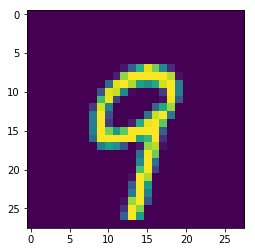

In [10]:
plt.imshow(np.reshape(images[0], [28, 28]))

**[MDS-05]** 해당 라벨을 확인한다. 첫 번째 요소를 0번째로 볼 때 앞에서부터 7번째 요소가 1로 되어 있으므로, 숫자 '7'의 이미지라는 것을 나타낸다.

In [11]:
print(labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**[MDS-06]** 이미지 데이터를 실제 이미지로 출력해본다.

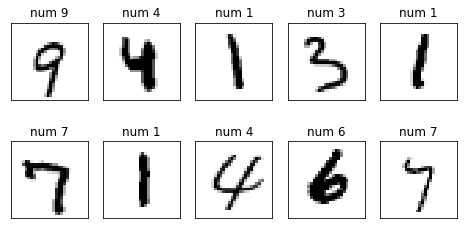

In [12]:
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([]) # x축 값들을 설정
    subplot.set_yticks([]) # y축 값들을 설정
    subplot.set_title('num %d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r)

**[MSE-03]** 소프트맥스 함수에 의한 확률 p 계산식을 준비한다.

$$p = Softmax(x * w + w0)$$

In [13]:
x = tf.placeholder(tf.float32, [None, 784])
x

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

In [14]:
w = tf.Variable(tf.zeros([784, 10]))
w

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>

In [15]:
w0 = tf.Variable(tf.zeros([10]))
w0

<tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>

In [16]:
f = tf.matmul(x, w) + w0
f

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [17]:
p = tf.nn.softmax(f)
p

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

**[MSE-04]** 오차 함수 loss와 트레이닝 알고리즘 train_step을 준비한다.

In [18]:
t = tf.placeholder(tf.float32, [None, 10])
t

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [19]:
loss = -tf.reduce_sum(t * tf.log(p))
loss

<tf.Tensor 'Neg:0' shape=() dtype=float32>

In [20]:
train_step = tf.train.AdamOptimizer().minimize(loss)
train_step

<tf.Operation 'Adam' type=NoOp>

**[MSE-05]** 정답률 accuracy를 정의한다.

In [21]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

위 두 개의 코드는 이와 같이 동작한다.

In [23]:
a = np.array([[0.1, 0.2, 0.7],
              [0.4, 0.3, 0.3],
              [0.5, 0.2, 0.3]])
b = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])

In [24]:
argmax_a, argmax_b = np.argmax(a, 1), np.argmax(b, 1)
print(argmax_a, argmax_b)

[2 0 0] [2 0 1]


In [25]:
equal = np.equal(np.argmax(a, 1), np.argmax(b, 1))
print(equal)

[ True  True False]


In [26]:
equal = equal.astype(np.float32)
print(equal)

[1. 1. 0.]


In [27]:
np.sum(equal)

2.0

**[MSE-06]** 세션을 준비하고 Variable을 초기화한다.

In [28]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

**[MSE-07]** 파라미터 최적화를 2000회 반복한다.

1회 실행할 때마다 트레이닝 세트에서 추출한 100개의 데이터를 이용해 경사 하강법을 적용한다.

최종적으로 테스트 세트에 대해 약 92%의 정답률을 얻을 수 있다.

In [29]:
for i in range(3000):
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 0, Loss: 22621.091797, Accuracy: 0.450700
Step: 100, Loss: 7497.684082, Accuracy: 0.848000
Step: 200, Loss: 5344.239258, Accuracy: 0.876700
Step: 300, Loss: 4512.037598, Accuracy: 0.890800
Step: 400, Loss: 4051.659668, Accuracy: 0.898000
Step: 500, Loss: 3804.811035, Accuracy: 0.904000
Step: 600, Loss: 3597.444092, Accuracy: 0.905600
Step: 700, Loss: 3471.178223, Accuracy: 0.908300
Step: 800, Loss: 3342.287842, Accuracy: 0.910700
Step: 900, Loss: 3245.588379, Accuracy: 0.912100
Step: 1000, Loss: 3186.593994, Accuracy: 0.913100
Step: 1100, Loss: 3123.515137, Accuracy: 0.914800
Step: 1200, Loss: 3067.337891, Accuracy: 0.916400
Step: 1300, Loss: 3032.875488, Accuracy: 0.915800
Step: 1400, Loss: 3003.780762, Accuracy: 0.917500
Step: 1500, Loss: 2974.766357, Accuracy: 0.918200
Step: 1600, Loss: 2934.073730, Accuracy: 0.918300
Step: 1700, Loss: 2897.264160, Accuracy: 0.920000
Step: 1800, Loss: 2880.638428, Accuracy: 0.921200
Step: 1900, Loss: 2862.976074, Accuracy: 0.921200
Step: 2000,

**[MSE-08]** 이 시점의 파라미터를 이용해 테스트 세트에 대한 예측을 출력한다.

여기서는 '0' ~ '9'의 숫자에 대해 정답과 오답 예를 3개씩 출력한다.

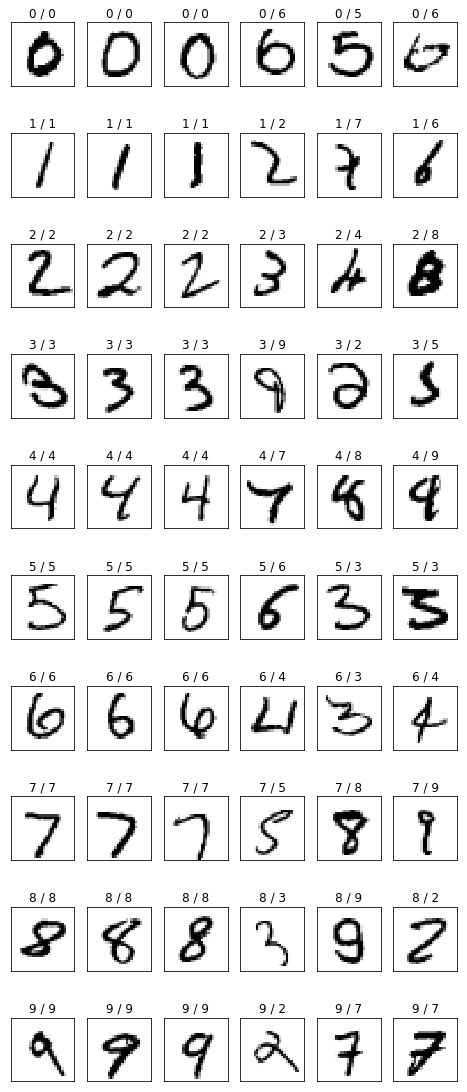

In [30]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,20))

# 0번부터 9번까지
for i in range(10):
    
    # 그림으로 나타낼 그림 갯수 (6개)
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        # prediction 값과, label 값을 구한다
        prediction, actual = np.argmax(pred), np.argmax(label)
        
        # preidction이 i번째 숫자이면 다음 코드를 실행
        if prediction != i:
            continue
            
        # 왼족 3개는 일치하는 숫자 오른쪽 3개는 틀린 숫자 그림들
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            
            # 10 x 6 칸에서 i * 6 + c번째 위치에
            subplot = fig.add_subplot(10,6,i*6+c)
            
            # x축 y축 숫자 제거
            subplot.set_xticks([])
            subplot.set_yticks([])
            
            # 각 그림의 제목은 (예측하는 숫자 / 실제 label)
            subplot.set_title('%d / %d' % (prediction, actual))
            
            # 그리기 (gray scale로)
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            
            # c count
            c += 1
            if c > 6:
                break

In [31]:
sess.close()